In [1]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score 

In [2]:
# Monta dataframe com nome dos arquivos
fn1 = os.listdir("D:/DropB/Faculeste/TCC/Imagens/COVID-19_Radiography_Dataset/Normal2/images")
fn2 = os.listdir("D:/DropB/Faculeste/TCC/Imagens/COVID-19_Radiography_Dataset/COVID/images")

ct1 = []
for fn in fn1:
  ct1.append([0])

df1 = pd.DataFrame({
  'arquivo': fn1,    
  'categoria': ct1   # Normal
})
#df1

ct2 = []
for fn in fn2:
  ct2.append([1])

df2 = pd.DataFrame({
  'arquivo': fn2,
  'categoria': ct2   # COVID
})
df = df1.append(df2)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_10416\3298725548.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [3]:
# gerando dataframes de treinamento e de teste
dfTreinamento = df.sample(frac=0.7, random_state=100) # 70% de treinamento
dfTeste = df[~df['arquivo'].isin(dfTreinamento['arquivo'])]     # 30% de teste

In [4]:
width = 32
height = 32
depth = 3
classes = 2
inputShape = (height, width, depth)

In [5]:
imgGen = ImageDataGenerator(rescale = 1./255, 
                            shear_range=0.25, 
                            zoom_range = 0.25, 
                            horizontal_flip = True)

conjTreinamento = imgGen.flow_from_dataframe(dfTreinamento, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=5000, 
                                  class_mode='categorical')

conjTeste = imgGen.flow_from_dataframe(dfTeste, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=2000, 
                                  class_mode='categorical')


Found 5110 validated image filenames belonging to 2 classes.
Found 2190 validated image filenames belonging to 2 classes.


In [6]:
# ShallowNet - Ajustar imagens para 32 x 32
from shallowNet import ShallowNet
shlwClf = ShallowNet()
shlwClf = shlwClf.build(width=width, height=height, depth=3, classes=2)
shlwClf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 2)                 65538     
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________


c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# Lenet5 - Ajustar imagens para 32 x 32
from leNet5M import LeNet5M
ln5Clf = LeNet5M()
ln5clfM = ln5Clf.build(h=height, w=width, prof=3, cl=2)
ln5clfM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 6)          0         
 ePooling2D)                                                     
                                                                 
 dense_1 (Dense)             (None, 5, 5, 120)         840       
                                                                 
 flatten_1 (Flatten)         (None, 3000)             

In [8]:
# AlexNet - Ajustar imagens para 32 x 32
from alexNet import AlexNet
alxClf = AlexNet()
alxClf = alxClf.build(width=width, height=height, depth=3, classes=2)
alxClf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 384)        

In [9]:
# VGG16 - Ajustar imagens para 32 x 32
from vgg16M import Vgg16M
vggClf = Vgg16M()
vggClf = vggClf.build(width=width, height=height, depth=3, classes=2)
vggClf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_2 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 32, 32, 64)        0         
                                                      

In [10]:
# CheXNet - Ajustar imagens para 32 x 32
from cxNet import CXNet
cxClf = CXNet()
cxClf = cxClf.build(width=width, height=height, depth=3, classes=2)
cxClf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv3_block5_1_relu[0][0]']    
                                                                                                  
 conv3_block5_concat (Concatena  (None, 4, 4, 288)   0           ['conv3_block4_concat[0][0]',    
 te)                                                              'conv3_block5_2_conv[0][0]']    
                                                                                                  
 conv3_blo

In [11]:
spe = 2
epc = 40
vls = 2

In [12]:

print("Shallow Net ***************************************************")
h1 = shlwClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

print("LeNet 5 *******************************************************")
h2 = ln5clfM.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

print("AlexNet *******************************************************")
h3 = alxClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

print("Vgg16 *********************************************************")
h4 = vggClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history 

print("cxNet *********************************************************")
h5 = cxClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

Shallow Net ***************************************************


Epoch 1/40
2/2 [==============================] - 80s 76s/step - loss: 7.8012 - accuracy: 0.4945 - val_loss: 0.7021 - val_accuracy: 0.5018
Epoch 2/40
2/2 [==============================] - 17s 17s/step - loss: 0.6974 - accuracy: 0.5063 - val_loss: 0.6951 - val_accuracy: 0.5018
Epoch 3/40
2/2 [==============================] - 17s 5s/step - loss: 0.6942 - accuracy: 0.5063 - val_loss: 0.6919 - val_accuracy: 0.5018
Epoch 4/40
2/2 [==============================] - 17s 17s/step - loss: 0.6900 - accuracy: 0.5063 - val_loss: 0.6890 - val_accuracy: 0.5018
Epoch 5/40
2/2 [==============================] - 17s 17s/step - loss: 0.6877 - accuracy: 0.5067 - val_loss: 0.6861 - val_accuracy: 0.5023
Epoch 6/40
2/2 [==============================] - 17s 5s/step - loss: 0.6862 - accuracy: 0.5070 - val_loss: 0.6861 - val_accuracy: 0.6333
Epoch 7/40
2/2 [==============================] - 17s 5s/step - loss: 0.6862 - accuracy: 0.6327 - val_loss: 0.6821 - val_accuracy: 0.6402
Epoch 8/40
2/2 [==============

In [13]:
# gerando o Vetor de Categorias
categorias = []
qtdCovid = 0
for i in conjTeste[0][1]:
    categorias.append(0 if i[0] > 0.0 else 1)

In [14]:
# Gerando predições
prdSlhw = shlwClf.predict(conjTeste[0][0])
prdLNt5 = ln5clfM.predict(conjTeste[0][0])
prdAlxN = alxClf.predict(conjTeste[0][0])
prdVgg  = vggClf.predict(conjTeste[0][0])
prdClx  = cxClf.predict(conjTeste[0][0])

63/63 [==============================] - 7s 71ms/step


In [15]:
# preparando conjuntos para matriz de confusão
predShallow = []
for i in prdSlhw:
    predShallow.append(0 if i[0] >= 0.5 else 1)

predLenet5 = []
for i in prdLNt5:
    predLenet5.append(0 if i[0] >= 0.5 else 1)

predAlex = []
for i in prdAlxN:
    predAlex.append(0 if i[0] >= 0.5 else 1)

predVgg = []
for i in prdVgg:
    predVgg.append(0 if i[0] >= 0.5 else 1)

predClx = []
for i in prdClx:
    predClx.append(0 if i[0] >= 0.5 else 1)


In [28]:
conta = 0
for i in predVgg:
    conta += i
conta

0

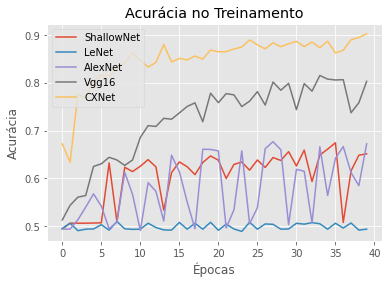

<Figure size 432x288 with 0 Axes>

In [16]:
# Gráfico de Acurácia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["accuracy"], label="ShallowNet")
plt.plot(np.arange(0, epc), h2["accuracy"], label="LeNet")
plt.plot(np.arange(0, epc), h3["accuracy"], label="AlexNet")
plt.plot(np.arange(0, epc), h4["accuracy"], label="Vgg16")
plt.plot(np.arange(0, epc), h5["accuracy"], label="CXNet")
plt.title("Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()
plt.savefig('acuracia.png', format='png')

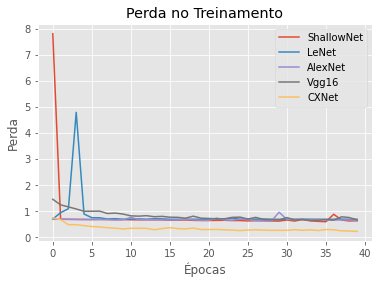

<Figure size 432x288 with 0 Axes>

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["loss"], label="ShallowNet")
plt.plot(np.arange(0, epc), h2["loss"], label="LeNet")
plt.plot(np.arange(0, epc), h3["loss"], label="AlexNet")
plt.plot(np.arange(0, epc), h4["loss"], label="Vgg16")
plt.plot(np.arange(0, epc), h5["loss"], label="CXNet")
plt.title("Perda no Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()
plt.savefig('perda.png', format='png')

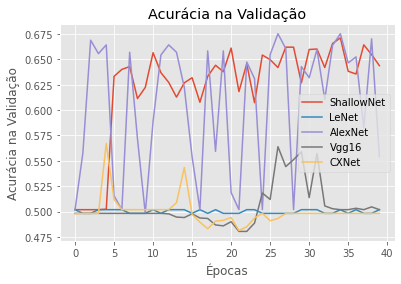

<Figure size 432x288 with 0 Axes>

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["val_accuracy"], label="ShallowNet")
plt.plot(np.arange(0, epc), h2["val_accuracy"], label="LeNet")
plt.plot(np.arange(0, epc), h3["val_accuracy"], label="AlexNet")
plt.plot(np.arange(0, epc), h4["val_accuracy"], label="Vgg16")
plt.plot(np.arange(0, epc), h5["val_accuracy"], label="CXNet")
plt.title("Acurácia na Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia na Validação")
plt.legend()
plt.show()
plt.savefig('acuraciaValidacao.png', format='png')

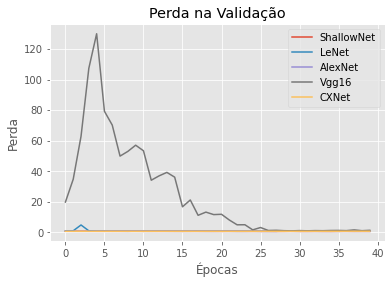

<Figure size 432x288 with 0 Axes>

In [19]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["val_loss"], label="ShallowNet")
plt.plot(np.arange(0, epc), h2["val_loss"], label="LeNet")
plt.plot(np.arange(0, epc), h3["val_loss"], label="AlexNet")
plt.plot(np.arange(0, epc), h4["val_loss"], label="Vgg16")
plt.plot(np.arange(0, epc), h5["val_loss"], label="CXNet")
plt.title("Perda na Validação")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()
plt.savefig('perdaValidacao.png', format='png')

In [20]:
def geraMtConf(vReal, vPred):
  tp, fp, tn, fn = 0, 0, 0, 0
  for i in range(0, len(vReal)):
    tp = tp + 1 if vReal[i] == 1 and vPred == 1 else 0
    tn = tp + 1 if vReal[i] == 0 and vPred == 0 else 0
    fp = fp + 1 if vReal[i] == 0 and vPred == 1 else 0
    fn = fn + 1 if vReal[i] == 1 and vPred == 0 else 0
  return np.array([[tp, fp],[fn, tn]])

In [21]:
print("ShallowNet: ")
print(".......... Acuracia: ", accuracy_score(categorias, predShallow))
print(".......... Precisão: ", precision_score(categorias, predShallow))
print(".......... Recall  : ", recall_score(categorias, predShallow))
print(".......... F1-Score: ", f1_score(categorias, predShallow))

ShallowNet: 
.......... Acuracia:  0.6375
.......... Precisão:  0.7782340862422998
.......... Recall  :  0.38052208835341367
.......... F1-Score:  0.5111260957518544


In [22]:
print("LeNet: ")
print(".......... Acuracia: ", accuracy_score(categorias, predLenet5))
print(".......... Precisão: ", precision_score(categorias, predLenet5))
print(".......... Recall  : ", recall_score(categorias, predLenet5))
print(".......... F1-Score: ", f1_score(categorias, predLenet5))

LeNet: 
.......... Acuracia:  0.502
.......... Precisão:  0.0
.......... Recall  :  0.0
.......... F1-Score:  0.0


c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print("AlexNet: ")
print(".......... Acuracia: ", accuracy_score(categorias, predAlex))
print(".......... Precisão: ", precision_score(categorias, predAlex))
print(".......... Recall  : ", recall_score(categorias, predAlex))
print(".......... F1-Score: ", f1_score(categorias, predAlex))

AlexNet: 
.......... Acuracia:  0.5405
.......... Precisão:  0.8290598290598291
.......... Recall  :  0.09738955823293173
.......... F1-Score:  0.17430368373764601


In [24]:
print("VGG16: ")
print(".......... Acuracia: ", accuracy_score(categorias, predVgg))
print(".......... Precisão: ", precision_score(categorias, predVgg))
print(".......... Recall  : ", recall_score(categorias, predVgg))
print(".......... F1-Score: ", f1_score(categorias, predVgg))

VGG16: 
.......... Acuracia:  0.502
.......... Precisão:  0.0
.......... Recall  :  0.0
.......... F1-Score:  0.0


c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print("CxNet: ")
print(".......... Acuracia: ", accuracy_score(categorias, predClx))
print(".......... Precisão: ", precision_score(categorias, predClx))
print(".......... Recall  : ", recall_score(categorias, predClx))
print(".......... F1-Score: ", f1_score(categorias, predClx))

CxNet: 
.......... Acuracia:  0.498
.......... Precisão:  0.498
.......... Recall  :  1.0
.......... F1-Score:  0.664886515353805


In [26]:
# Gerando predições
prdSlhw1 = shlwClf.predict(conjTreinamento[0][0])
prdLNt51 = ln5clfM.predict(conjTreinamento[0][0])
prdAlxN1 = alxClf.predict(conjTreinamento[0][0])
prdVgg1  = vggClf.predict(conjTreinamento[0][0])
prdClx1  = cxClf.predict(conjTreinamento[0][0])

157/157 [==============================] - 14s 89ms/step
